mengambil library yang akan digunakan

In [1]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd

In [2]:
from mlxtend.data import loadlocal_mnist # Import the loadlocal_mnist function

# Call the function and unpack its return values
train_images, train_labels = loadlocal_mnist(
    images_path='/content/emnist-mnist-train-images-idx3-ubyte',
    labels_path='/content/emnist-mnist-train-labels-idx1-ubyte'
)

In [3]:
test_images, test_labels = loadlocal_mnist(
    images_path='/content/emnist-mnist-test-images-idx3-ubyte',
    labels_path='/content/emnist-mnist-test-labels-idx1-ubyte'
)

In [4]:
n_samples = 1000
train_images = train_images[:n_samples]
train_labels = train_labels[:n_samples]
test_images = test_images[:n_samples]
test_labels = test_labels[:n_samples]

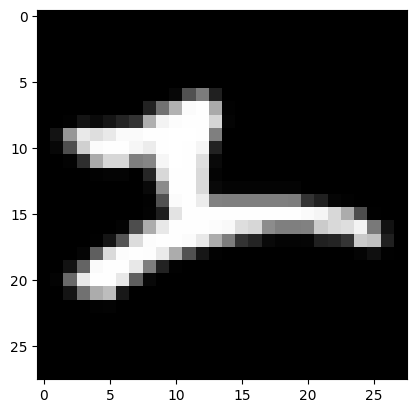

In [5]:
plt.imshow(train_images[2].reshape(28,28), cmap='gray')

In [6]:
train_labels[2]

4

In [7]:
hog_features_train = []
hog_images_train = []
for image in train_images:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations = 9,
                           pixels_per_cell = (8,8),
                           cells_per_block = (2,2),
                           visualize = True,
                           block_norm = 'L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)

hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

<BarContainer object of 144 artists>

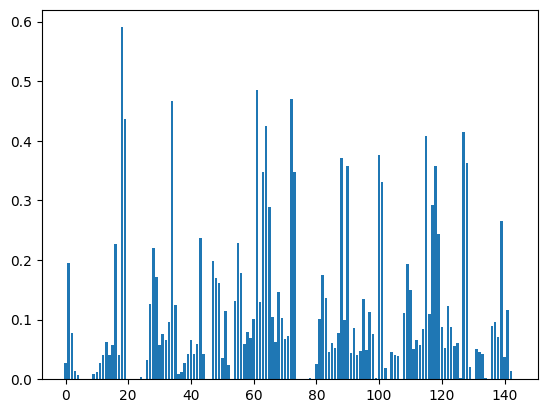

In [8]:
plt.bar(list(range(feature.shape[0])), feature)

In [9]:
hog_features_test = []
hog_images_test = []
for image in test_images:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations = 9,
                           pixels_per_cell = (8,8),
                           cells_per_block = (2,2),
                           visualize = True,
                           block_norm = 'L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

In [10]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

In [11]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(hog_features_train_scaled, train_labels)

SVC(C=1, kernel='linear')

In [12]:
predictions = svm_model.predict(hog_features_test_scaled)


In [13]:
loo = LeaveOneOut()


In [20]:
accuracies = []
precisions = []
f1_scores = []
all_true_labels = []
all_predicted_labels = []
confusion_matrices = []

In [21]:
for train_index, test_index in loo.split(train_images):
    X_train, X_test = train_images[train_index], train_images[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    model = SVC()
    model.fit(X_train, y_train)
    # Use X_test instead of test_images to predict on the current test sample
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted', zero_division=1))  # Handle zero division
    all_true_labels.extend(y_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    all_predicted_labels.extend(y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use th

In [30]:
y_pred = model.predict(X_test)
avg_accuracy = np.mean(accuracies)
f1_scores.append(f1_score(y_test, y_pred, average='macro'))  # Handle zero division
avg_precision = np.mean(precisions)
avg_f1_score = np.mean(f1_scores)
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average F1 Score: {avg_f1_score}")

Average Accuracy: 0.923
Average Precision: 1.0
Average F1 Score: 0.9230769230769231


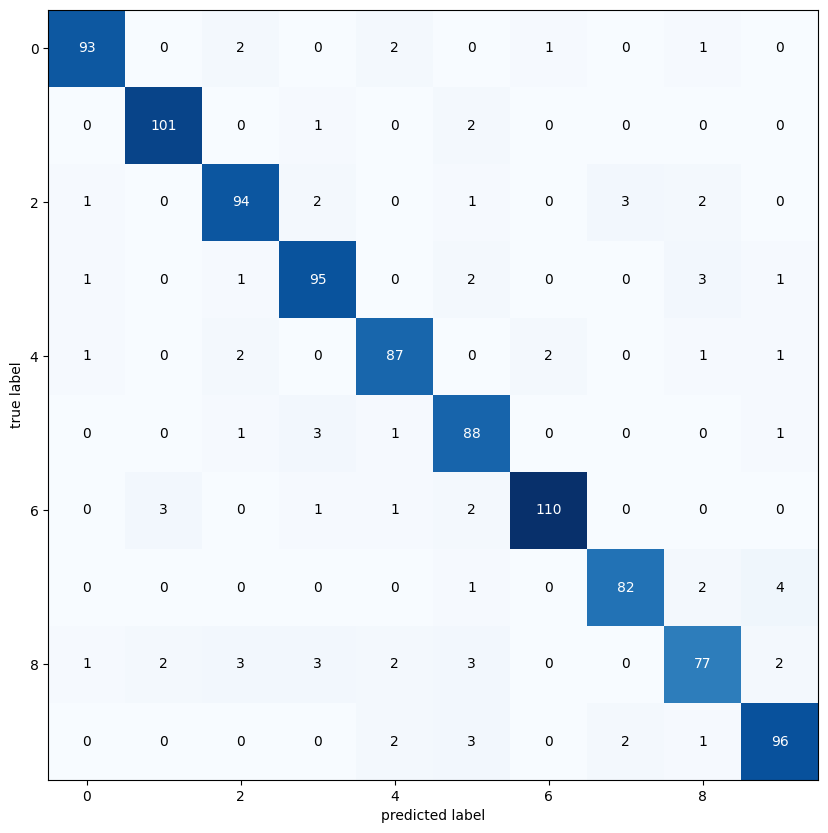

In [25]:
cm = confusion_matrix(all_true_labels, all_predicted_labels)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10, 10))
plt.show()